<img src="https://startupnation.com/wp-content/uploads/2018/07/Screen-Shot-2018-07-12-at-3.54.54-PM.png">

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("startup_funding.csv")

In [4]:
#cleanining the data set
df.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]

def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

for col in ["StartupName", "IndustryVertical", "SubVertical", "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]:
    df[col] = df[col].apply(lambda x: clean_string(x))
    
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",nan
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",nan
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",nan
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",nan
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",nan


In [5]:
df.shape

(3044, 10)

In [6]:
df.isnull().mean()

SNo                 0.0
Date                0.0
StartupName         0.0
IndustryVertical    0.0
SubVertical         0.0
City                0.0
InvestorsName       0.0
InvestmentType      0.0
AmountInUSD         0.0
Remarks             0.0
dtype: float64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               3044 non-null   int64 
 1   Date              3044 non-null   object
 2   StartupName       3044 non-null   object
 3   IndustryVertical  3044 non-null   object
 4   SubVertical       3044 non-null   object
 5   City              3044 non-null   object
 6   InvestorsName     3044 non-null   object
 7   InvestmentType    3044 non-null   object
 8   AmountInUSD       3044 non-null   object
 9   Remarks           3044 non-null   object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [8]:
#converting string date to date-time column
df["Date"]=pd.to_datetime(df["Date"])

In [9]:
#dropping the non-req columns
df.drop(["SNo","Remarks"],axis=1,inplace=True)

In [11]:
#working with year column
df["year"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year

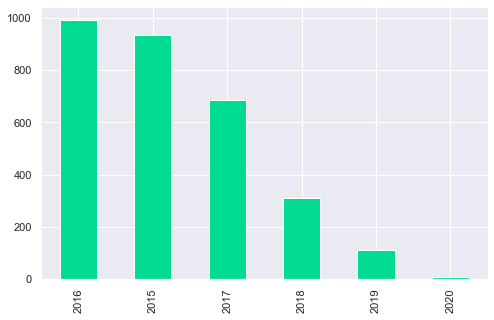

In [12]:
#funding deals over year
plt.figure(figsize=(8,5))
sns.set(palette="winter_r")
df["year"].value_counts().plot.bar()

Year 2016 saw the maximum funding. 

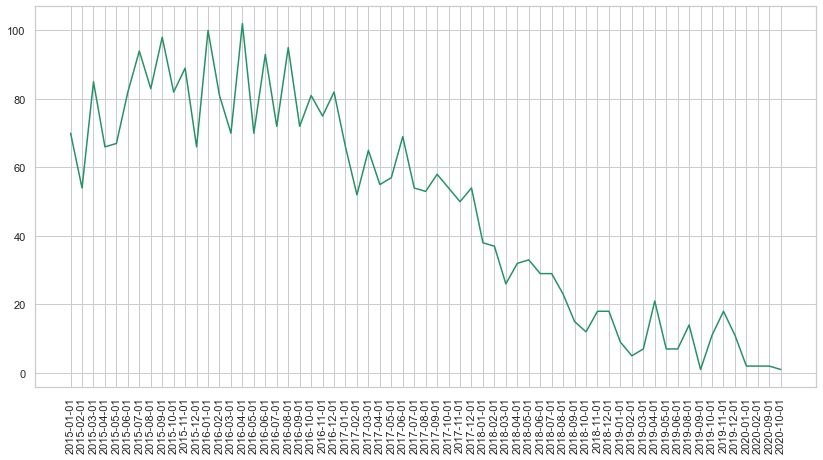

In [14]:
#funding deals month on month
df["yearmonth"] = (pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.year*100)+(pd.to_datetime(df['Date'],format='%d/%m/%Y').dt.month)

df["yearmonth"] = pd.to_datetime(df['Date'],format='%d/%m/%Y').apply(lambda x: datetime.date(x.year,x.month,1))

cnt_srs = df["yearmonth"].value_counts()
cnt_srs = cnt_srs.sort_index()

x=cnt_srs.index.astype(str)
y=cnt_srs.values

plt.figure(figsize=(14,7))
sns.set(style="whitegrid",palette="summer")
plt.xticks(rotation=90)
plt.plot(x,y)

Funding amount decreased significantly over time .

In [15]:
#cleaning Amounts column and converting it to Funding Crs
df['AmountInUSD']=df['AmountInUSD'].replace(",","",regex=True)
df['AmountInUSD']=df['AmountInUSD'].replace('14342000+',14342000)
df['AmountInUSD']=df['AmountInUSD'].replace("unknown",np.nan)
df['AmountInUSD']=df['AmountInUSD'].replace("undisclosed",np.nan)
df['AmountInUSD']=df['AmountInUSD'].replace("Undisclosed",np.nan)
df['AmountInUSD']=df['AmountInUSD'].replace("N/A",np.nan)
df.dropna(axis=0,inplace=True)
df['AmountInUSD']=df['AmountInUSD'].astype(float)
df['AmountInRuppes']=df['AmountInUSD']*73
df['FundingInCrs']=df['AmountInRuppes']/10000000
df.drop(["AmountInUSD","AmountInRuppes"],axis=1,inplace=True)
df.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,year,yearmonth,FundingInCrs
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,2020,2020-09-01,1460.000000
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,2020,2020-01-01,58.753276
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,2020,2020-09-01,134.019678
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,2020,2020-02-01,21.900000
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,2020,2020-02-01,13.140000


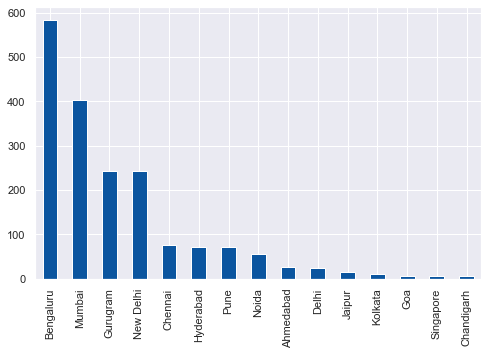

In [16]:
#funding in various cities
df['City']=df['City'].replace("nan",np.nan)
df['City']=df['City'].replace("Bangalore","Bengaluru",regex=True)
df['City']=df['City'].replace("Gurgaon","Gurugram",regex=True)
df.dropna(axis=0,inplace=True)
plt.figure(figsize=(8,5))
sns.set(palette="Blues_r")
df["City"].value_counts().head(15).plot.bar()

Bengaluru has the highest no of startups.

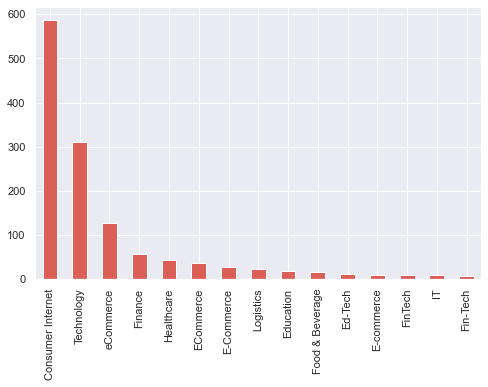

In [18]:
#industries are favored by investors for funding
plt.figure(figsize=(8,5))
sns.set(style="darkgrid",palette="hls")
df["IndustryVertical"].value_counts().head(15).plot.bar()

Consumer Internet received maximum funding.

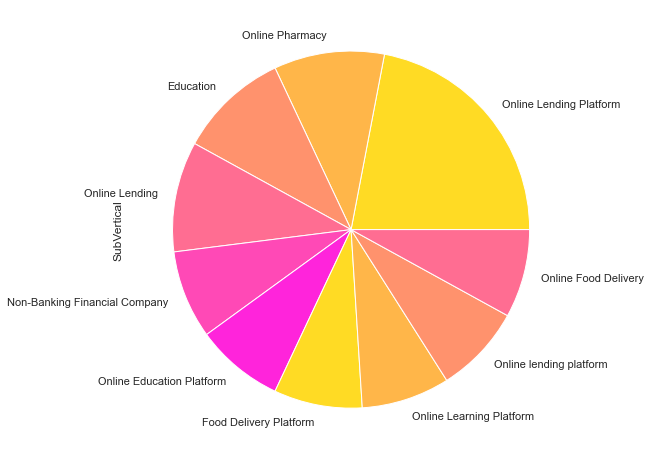

In [19]:
#type of industries are favored by investors for funding
df["SubVertical"]=df["SubVertical"].replace("nan",np.nan)
df.dropna(axis=0,inplace=True)
plt.figure(figsize=(8,10))
sns.set(style="dark",palette="spring_r")
df["SubVertical"].value_counts().head(10).plot.pie()

Online Lending Platform received max funding.

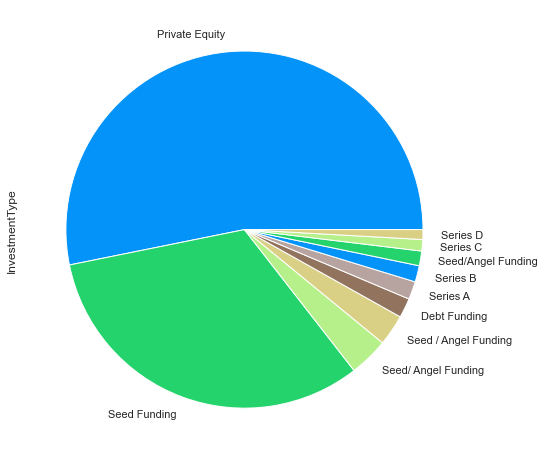

In [23]:
plt.figure(figsize=(8,12))
sns.set(style="dark",palette='terrain')
df["InvestmentType"].value_counts().head(10).plot.pie()

Most of the Investment Types are Private Equity Types.

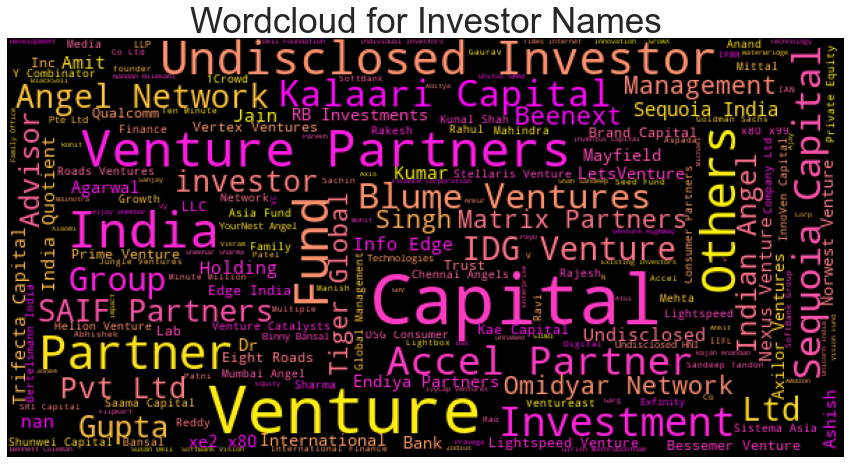

In [24]:
#wordcloud of investors
from wordcloud import WordCloud

names = df["InvestorsName"][~pd.isnull(df["InvestorsName"])]
#print(names)
wordcloud = WordCloud(max_font_size=50, width=600, height=300,background_color='black',colormap='spring').generate(' '.join(names))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=35)
plt.axis("off")
plt.show()

<ipython-input-29-6e40dec94d38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
<ipython-input-29-6e40dec94d38>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvestorsName'][df['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
<ipython-input-29-6e40dec94d38>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inve

<Figure size 720x504 with 0 Axes>

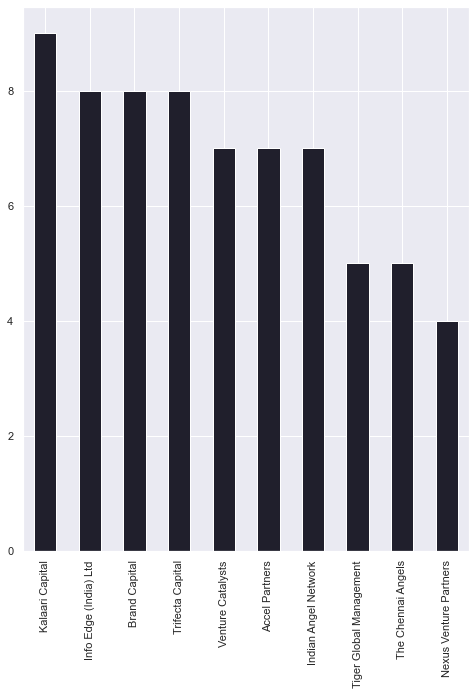

In [29]:
#investors who have invested maximum funds..
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
df['InvestorsName'][df['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
plt.figure(figsize=(10,7))
df["InvestorsName"]=df["InvestorsName"].replace("nan",np.nan)
df["InvestorsName"]=df["InvestorsName"].replace('Undisclosed Investors',np.nan)
df.dropna(axis=0,inplace=True)
plt.figure(figsize=(8,10))
sns.set(style="darkgrid",palette="bone")
df["InvestorsName"].value_counts().head(10).plot.bar()

Kalaari Capital invested maximum over this period of time.